# Ejercicio Random User

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "https://randomuser.me/api/?results=30"
response = requests.get(url)

if response.status_code == 200:
  data = response.json()
else:
  print("Error: ", response.status_code)

In [3]:
users = data["results"]
users[0]

{'gender': 'female',
 'name': {'title': 'Ms', 'first': 'Alise', 'last': 'Marstein'},
 'location': {'street': {'number': 7919, 'name': 'Tromsøgata'},
  'city': 'Krøderen',
  'state': 'Oslo',
  'country': 'Norway',
  'postcode': '7425',
  'coordinates': {'latitude': '42.6458', 'longitude': '47.7259'},
  'timezone': {'offset': '+9:00',
   'description': 'Tokyo, Seoul, Osaka, Sapporo, Yakutsk'}},
 'email': 'alise.marstein@example.com',
 'login': {'uuid': '08bdce69-7e8e-4d20-bfc0-b31c29b6872b',
  'username': 'angrypanda277',
  'password': 'seamus',
  'salt': '6F51kbE9',
  'md5': '36a96c09b77df06af2aa2a2e02b720bb',
  'sha1': '149872935f46e349d76ee0369a4a63c5d09b33e7',
  'sha256': '26553e5d9962347be83100a9ae96a9ac161855f1aab2e25e0798ac1fe001eca0'},
 'dob': {'date': '1951-02-20T06:48:56.097Z', 'age': 73},
 'registered': {'date': '2017-10-27T17:44:47.815Z', 'age': 6},
 'phone': '67454176',
 'cell': '99313622',
 'id': {'name': 'FN', 'value': '20025140207'},
 'picture': {'large': 'https://randomu

In [4]:
df_users = pd.json_normalize(users)
df_users.head(2)

,gender,email,phone,cell,nat,name.title,name.first,name.last,location.street.number,location.street.name,...,login.sha256,dob.date,dob.age,registered.date,registered.age,id.name,id.value,picture.large,picture.medium,picture.thumbnail
0,female,alise.marstein@example.com,67454176,99313622,NO,Ms,Alise,Marstein,7919,Tromsøgata,...,26553e5d9962347be83100a9ae96a9ac161855f1aab2e2...,1951-02-20T06:48:56.097Z,73,2017-10-27T17:44:47.815Z,6,FN,20025140207,https://randomuser.me/api/portraits/women/15.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...
1,female,milja.huhta@example.com,08-659-491,049-065-41-99,FI,Mrs,Milja,Huhta,3029,Pyynikintie,...,7d59725d288d0af11f865a81dac8475e40138b65307710...,1981-01-15T23:27:24.671Z,43,2011-12-09T20:49:35.100Z,12,HETU,NaNNA390undefined,https://randomuser.me/api/portraits/women/70.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...


In [5]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   gender                          30 non-null     object
 1   email                           30 non-null     object
 2   phone                           30 non-null     object
 3   cell                            30 non-null     object
 4   nat                             30 non-null     object
 5   name.title                      30 non-null     object
 6   name.first                      30 non-null     object
 7   name.last                       30 non-null     object
 8   location.street.number          30 non-null     int64 
 9   location.street.name            30 non-null     object
 10  location.city                   30 non-null     object
 11  location.state                  30 non-null     object
 12  location.country                30 non-null     obje

In [6]:
df_gender_age = df_users[["gender", "dob.age"]]
df_gender_age.columns = ["Genero", "Edad"]
df_gender_age

,Genero,Edad
0,female,73
1,female,43
2,male,72
3,female,52
4,female,66
5,female,58
6,male,54
7,female,55
8,female,54
9,female,27


In [7]:
avg_age_per_gender = df_gender_age.groupby("Genero")["Edad"].mean()
avg_age_per_gender

,Edad
Genero,
female,53.666667
male,57.666667


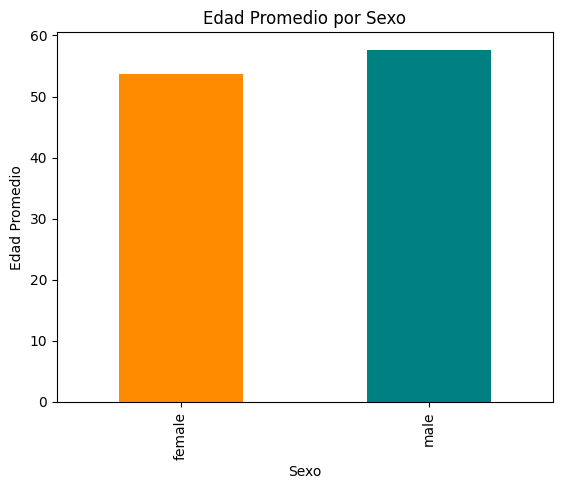

In [8]:
avg_age_per_gender.plot(kind="bar", color=["DarkOrange", "teal"])
plt.title("Edad Promedio por Sexo")
plt.xlabel("Sexo")
plt.ylabel("Edad Promedio")
plt.show()

# Ejercicios (0.5 por ejercicio)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df_books = pd.read_csv("/content/drive/MyDrive/bootcamp-ds/pandas/Data/libros.csv")
df_books.head(2)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction


1. Gráfico de barras para mostrar la sumatoria de reviews por año

In [11]:
df_year_reviews_sum = df_books.groupby("Year")["Reviews"].sum()
df_year_reviews_sum

,Reviews
Year,
2009,235506
2010,273981
2011,405041
2012,654546
2013,654907
2014,792997
2015,711669
2016,709800
2017,644420


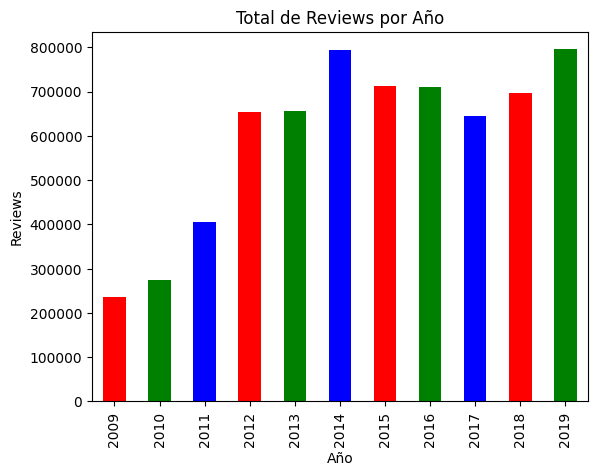

In [15]:
colors = ["r","g","b"]
df_year_reviews_sum.plot(kind="bar", color=colors)
plt.title("Total de Reviews por Año")
plt.xlabel("Año")
plt.ylabel("Reviews")
plt.show()

2. Mostrar gráfico de los 10 autores de ficción con mejor rating promedio y mayor numero de reviews acumuladas del año 2019.


In [35]:
# filter: Genre == "Fiction" & Year == 2019
# group: Author
#   - User Rating	-> mean
#   - Reviews -> sum
# sort: User Rating y Reviews
# head(10)

df_author_max_rating = df_books[(df_books["Year"] == 2019) & (df_books["Genre"] == "Fiction")].groupby("Author").agg({
    "Reviews" : "sum",
    "User Rating": "mean"
}).sort_values(["User Rating", "Reviews"], ascending=False).head(10)

df_author_max_rating = df_author_max_rating["User Rating"]
df_author_max_rating.head(2)

,User Rating
Author,
Dav Pilkey,4.9
Dr. Seuss,4.9


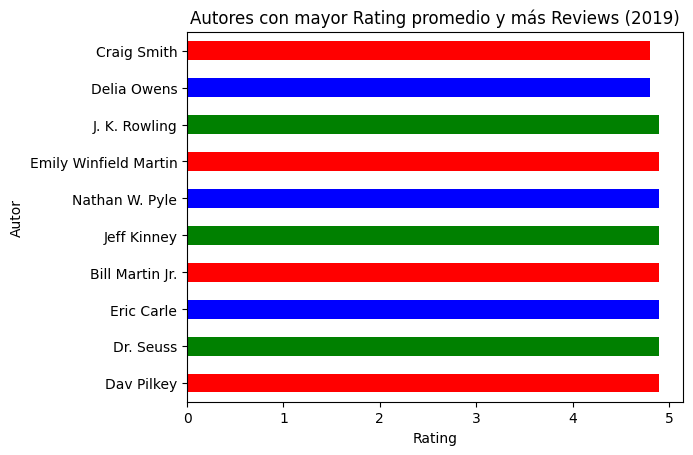

In [36]:
colors = ["r", "g", "b"]
df_author_max_rating.plot(kind="barh", color=colors)
plt.title("Autores con mayor Rating promedio y más Reviews (2019)")
plt.xlabel("Rating")
plt.ylabel("Autor")
plt.show()